# Day 4 — Logistic Regression

This notebook will guide you through implementing two logistic regression models:

1. Classifying the species of iris flowers (binary classification)
2. Classifying handwritten digits (multi-class classification)

## Task 1. Iris flower species

Given information about a flower's petals, can you determine what species it belongs to? In this first task, we will attempt to classify between two species of iris flowers.

1. [**Iris versicolor**](https://en.wikipedia.org/wiki/Iris_versicolor) is a species of irises native to Britain and Ireland.

  ![Iris-Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/440px-Blue_Flag%2C_Ottawa.jpg)

2. [**Iris-Virginica**](https://en.wikipedia.org/wiki/Iris_virginica) is a species of irises native to North America.

  ![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/440px-Iris_virginica_2.jpg)

First, let's import the libraries we will be needing.

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 1.1. Data Exploration

The dataset we will be using is a subset of the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which was created by statistician Ronald Fisher in 1936.

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1Mf0r4u3ff0FlA6n2TKuSOtBs0bvvPThT')
data

,petal_length,petal_width,species
0,4.7,1.4,0
1,4.5,1.5,0
2,4.9,1.5,0
3,4.0,1.3,0
4,4.6,1.5,0
...,...,...,...
95,5.2,2.3,1
96,5.0,1.9,1
97,5.2,2.0,1
98,5.4,2.3,1


Take some time to look through the dataset.

**Questions:**

1. How many flowers are in the dataset?
2. What is the mean length/width of the flowers? What about the median length/width?
3. *Bonus:* What is the mean length of each species? Do you notice any differences?

**Answers**
1. There are 100 flowers in the dataset.
2. The mean length and width are 4.906 cm and 1.676 cm, respectively. The median length and width are 4.900 cm and 1.600 cm, respectively.
3. The mean length of versicolor petals is 4.260 cm, whereas the mean length of the virgicana petals is 5.552 cm. This demonstrates that versicolor petals tend to be shorter than virgicana petals.

Note that a species of 0 corresponds to iris versicolor, and a species of 1 corresponds to iris virgicana. Also, all lengths are in centimeters.

In [ ]:
"""
Write some code to answer the above questions!
"""

# START CODE HERE

# Note: `data.describe()` also works!

print(f'# of flowers: {len(data)}')
print(f'mean length: {data.petal_length.mean():.3f}')
print(f'median length: {data.petal_length.median():.3f}')
print(f'mean width: {data.petal_width.mean():.3f}')
print(f'median width: {data.petal_width.median():.3f}')

data_versicolor = data[data.species == 0]
data_virgicana = data[data.species == 1]

print(f'versicolor mean length: {data_versicolor.petal_length.mean():.3f}')
print(f'virgicana mean length: {data_virgicana.petal_length.mean():.3f}')

# Answer to 3: The mean length of iris versicolor petals is 4.26 cm, and the
# mean length of iris virgicana petals is 5.552 cm. It seems that iris
# versicolor tends to have shorter petals than iris virgicana petals.

# END CODE HERE

# of flowers: 100
mean length: 4.906
median length: 4.900
mean width: 1.676
median width: 1.600
versicolor mean length: 4.260
virgicana mean length: 5.552


Finally, let's try to visualize our data. To do this, we can use matplotlib's `plt.scatter()` to create a scatterplot. This function accepts three main arguments:

```
plt.scatter(x, y, c=colors)
```

1. `x` is a list/array/series containing the x-coordinate of the points you want to plot.
2. `y` is a list/array/series containing the y-coordinate of the points you want to plot.
3. `colors` is a list/array/series that determines the color of each point.

**Question:** What might be a good way of visually dividing the data? How do you
think a logistic regression model might divide the data?

**Answers**: A good way to visually divide the data would be to use a linear trend line that separates data points of the two flowers. A logistic regression model would actually be a better representation of dividing the data, since it will account for the jump gap between the data points, unlike the linear model.

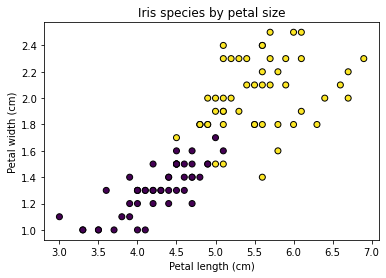

In [ ]:
"""
Create a scatterplot of petal length vs. petal width, with the points being
colored based on the iris species.
"""

# START CODE HERE

plt.scatter(
    data.petal_length, data.petal_width, c=data.species, edgecolors='black'
)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris species by petal size')
plt.show()

# END CODE HERE

### Step 1.2. Developing a Binary Classification Model

Now that we have taken a look at the data, we can move on to developing a classification model. Recall our goal from earlier: predict the species of an iris using information about the size of its petals. First, we need to split our dataset into inputs and outputs.

**Questions:**

1. Which columns of our dataset correspond to the *inputs* (predictors) to our model?
2. Which columns of our dataset correspond to the *outputs* (response) of our model?

**Answers:**

1. `petal_length` and `petal_width` would be the columns that correspond to the predictors of our model.
2. `species` would be the column that corresponds to the reponse of our model.

In [ ]:
"""
Create a variable called `X` that stores the input attributes, and a variable
called `y` that stores the output attributes.

X.shape should be (100, 2)
y.shape should be (100,)
"""

# START CODE HERE

X = data.loc[:, ['petal_length', 'petal_width']].to_numpy()
y = data['species']

# X = data['petal_length','petal_width'].to_numpy()

# END CODE HERE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

We will be using scikit-learn's `LogisticRegression`  class. You can find the documentation and example usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Run the following cells to train and evaluate this model on our dataset.

**Questions:**

1. How well does your model perform on the training set?
2. How well does your model perform on the testing set? Did it to better or
worse compared to the training set? Is the result what you expected?

**Answers:**

1. The model performed with an accuracy of 0.9403 on the training set.
2. The model performed with an accuracy of 0.9394 on the testing set. It did worse in comparison to the training set, which I did not expect. I was expecting the testing set to do better, since the model was already trained.

In [ ]:
"""
Create a new logistic regression model and fit it to the TRAINING dataset.
"""

# START CODE HERE

model = LogisticRegression()
model.fit(X_train, y_train)

# END CODE HERE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
"""
Check the accuracy of the model on the training and testing sets.
"""

# START CODE HERE

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Testing accuracy: {model.score(X_test, y_test)}')

# END CODE HERE

Training accuracy: 0.9253731343283582
Testing accuracy: 0.9393939393939394


Congratulations! You have successfully trained a logistic regression model. Finally, let's try to visualize what exactly our model is doing by adding the decision boundary to our scatterplot from earlier.

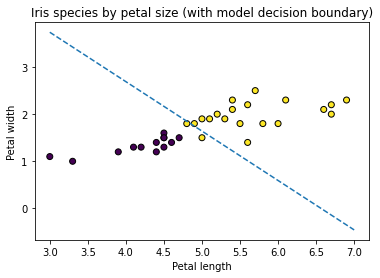

In [ ]:
def plot_decision_boundary(model, xmin, xmax):
  c1, c2 = model.coef_[0]
  b = model.intercept_
  x_values = np.array([xmin, xmax])
  y_values = -(c1 * x_values + b) / c2
  plt.plot(x_values, y_values, linestyle="dashed")

plot_decision_boundary(model, 3, 7)

"""
Use the code from earlier to create a scatterplot with axis labels and a title.
"""

# START CODE HERE

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris species by petal size (with model decision boundary)')

# END CODE HERE

plt.show()

## Task 2. Handwritten Digit Classification

Next, let's try something slightly more difficult. Given the pixel values of an image containing a handwritten digit, we want to try to identify which digit is in the image. This kind of task is known as **image classification**, and a lot of machine learning research has been devoted to similar tasks.

First, we will load in the data. The scikit-learn library already has this dataset built in, so you only need to run the following code.

In [ ]:
# Import function
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

This dataset contains 1797 images with a resolution of 8 pixels by 8 pixels. The format of the dataset is as follows:

* `X` is a 2-dimensional NumPy array with dimensions 1797x64. Each row is a length 64 vector corresponding to an image. The length of 64 comes from squashing the 8x8 image resolution into a 1-dimensional vector.

* `y` is a 1-dimensional NumPy array with length 1797. Each entry of `y` gives the value of the digit contained in the corresponding image from `X`.

Like before, let's start by exploring our data.

**Questions:**

1. How do you think an 8 pixel by 8 pixel image was squashed down into a length 64 vector?
2. Run the below cell several times, changing the value of `index` each time. How well are you able to identify the handwritten digit? How well do you think a logistic regression model would be at identifying the handwritten digit?

**Answers:**

1. I think an 8x8 image was squashed into a length 64 by turning into a 2D array. This would allow the 2-dimensional image to be reprensentated as a 1-dimensional length of data.
2. I was able to identify the digit, although some were more difficult than others due to their strange shape. I think the logistic regression model would be worse at identifying the handwritten digit, since handwriting varies much more than an 8x8 pixel image.

Digit: 4


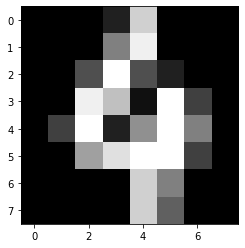

In [ ]:
index = 100

# Here, we use `np.reshape` to convert the length 64 vector into an 8x8 matrix.
image = X[index]
reshaped_image = np.reshape(image, (8, 8))

label = y[index]
print('Digit:', label)

plt.imshow(reshaped_image, cmap='gray')
plt.show()

Now, create a logistic regression model as before, and fit it to the training set. You will want to set the
`max_iter` parameter of `LogisticRegression` to 5000 to prevent scikit-learn from giving an error message about the number of iterations. Feel free to change `max_iter` to something else, and see if anything happens!

In [ ]:
"""
Create a model as before, and fit it to the training set.
"""

# START CODE HERE

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# END CODE HERE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
"""
Check the accuracy of the model on the training and testing sets.
"""

# START CODE HERE

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Testing accuracy: {model.score(X_test, y_test)}')

# END CODE HERE

Training accuracy: 1.0
Testing accuracy: 0.9764309764309764


Nice job! Did the model perform as you expected it to? For fun, we can test our model on some individual samples. Again, feel free to change the `index` variable's value to try other images.

**Question:** Do you suspect the model would have performed better if we used a larger image resolution? Why or why not?

**Answer:** I think the model would have performed better with a large image resolution because the data would have provided more points to analyze. As a result, the shape of the image would be more clear and incorrect analysis would have less effect on the overall outcome.

Correct digit: 8
Model prediction: 8


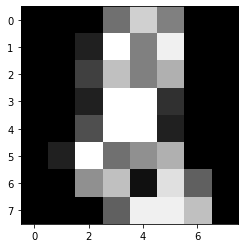

In [ ]:
index = 500

# Here, we use `np.reshape` to convert the length 64 vector into an 8x8 matrix.
image = X_test[index]
reshaped_image = np.reshape(image, (8, 8))

label = y_test[index]
print('Correct digit:', label)

prediction = model.predict([image])[0]
print('Model prediction:', prediction)

plt.imshow(reshaped_image, cmap='gray')
plt.show()